In [ ]:
#importing all the libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import seaborn as sns
import random
import csv
import math
import pickle
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [ ]:
#code to access the google dive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#read the data from pandas data drame
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')


In [ ]:
#how the data is looking initially,we just have pair of source and destination which represents connected edges in the graph
train_df.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [ ]:
#saving the data to a csv file for later use
train_df.to_csv('train_withoutheader.csv',header=False,index=False)

In [ ]:
#using networkx module data for graph analysis
g=nx.read_edgelist('train_withoutheader.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


In [ ]:
df_small=pd.read_csv('train.csv',nrows=100)

In [ ]:
g_small = nx.from_pandas_edgelist(df_small,'source_node','destination_node',create_using=nx.DiGraph())

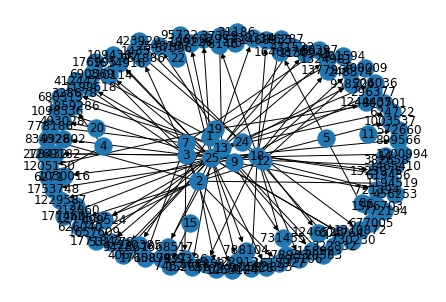

In [ ]:
#Visualizing the top 100 rows of the graph
nx.draw(g_small,with_labels=True)
plt.show()

In [ ]:
#Create a dictionary for analysis of the data
d=dict(g.in_degree())

In [ ]:
dict1 = OrderedDict(sorted(d.items()))

In [ ]:
#keys stores as nodes and value is the corresponding indegree
X=list(dict1.keys())
Y=list(dict1.values())

In [ ]:
#Wetook around 1500000 nodes for exploratory data analysis
X=X[0:1500000]
Y=Y[0:1500000]

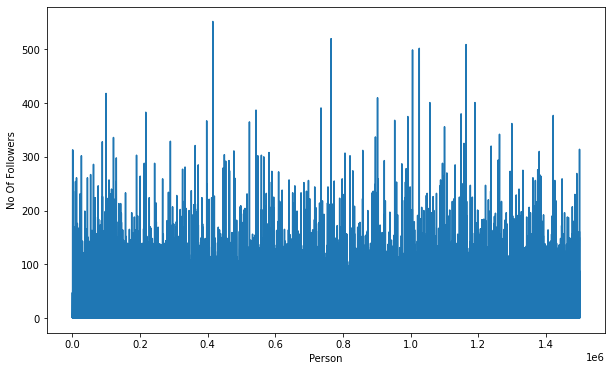

In [ ]:
#Plot the graph using matplotlib
#WE can see there are few spikes in the graph which shows that there few people who have high number  of  followers
plt.figure(figsize=(10,6))
plt.plot(X,Y)
plt.xlabel('Person')
plt.ylabel('No Of Followers')
plt.show()

In [ ]:
### 90-100 percentile
###Similar analysis:top 1 percent have high indegree means high number of followers
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(Y,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [ ]:
print("The number of unique persons",len(g.nodes()))

The number of unique persons 1862220


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'PDF of Indegree')

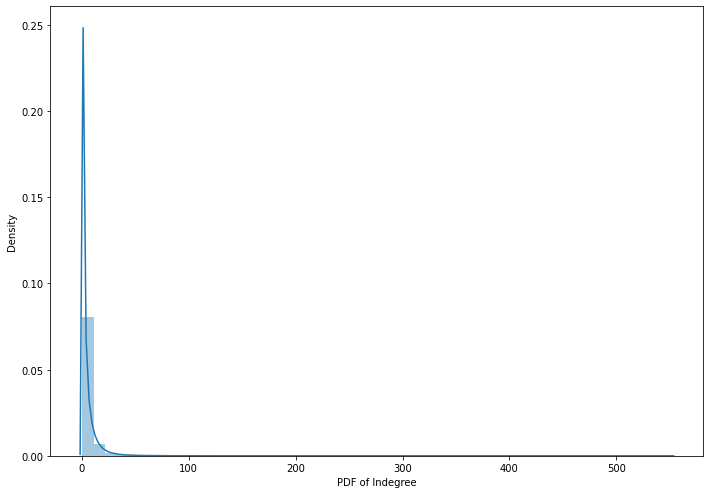

In [ ]:
#Plotting distribution of the indegree
dims= (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(Y)
plt.xlabel('PDF of Indegree')

In [ ]:
##Following stats Similar analysis is done for outdegree(followees)

In [ ]:
d_following=dict(g.out_degree())

In [ ]:
dict1_followng= OrderedDict(sorted(d_following.items()))

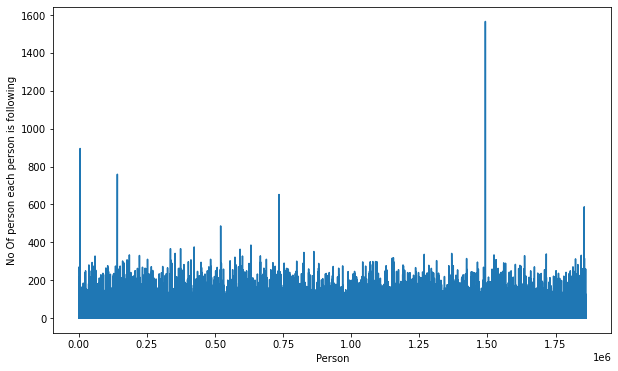

In [ ]:
X_following=list(dict1_followng.keys())
Y_following=list(dict1_followng.values())
plt.figure(figsize=(10,6))
plt.plot(X_following,Y_following)
plt.xlabel('Person')
plt.ylabel('No Of person each person is following')
plt.show()

In [ ]:
for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(Y_following,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'PDF of Outdegree')

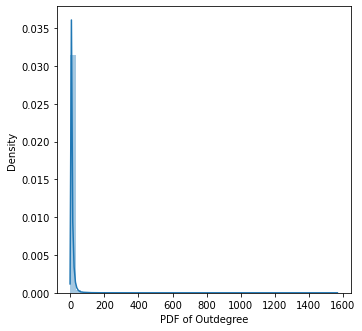

In [ ]:
dims= (5.27, 5.27)
fig, ax = plt.subplots(figsize=dims)
sns.distplot(Y_following)
plt.xlabel('PDF of Outdegree')

In [ ]:
#Some stats
Y=list(dict1.values())
Y_stats=np.array(Y)

In [ ]:
#Minimum number of follower=1
print("Minimum number of followers",Y_stats.min())
print(np.sum(Y_stats==Y_stats.min()),' persons having minimum no of followers + following')

Minimum number of followers 1
487160  persons having minimum no of followers + following


In [ ]:
#Maximum number of followers
print("Maximum number of followers",Y_stats.max())
print(np.sum(Y_stats==Y_stats.max()),' persons having maximum no of followers + following')

Maximum number of followers 900
1  persons having maximum no of followers + following


In [ ]:
train_df_new=csv.reader(open('train_withoutheader.csv','r'))
train_df_new

In [ ]:
edge_list={}
for edge in train_df_new:
    edge_list[(edge[0],edge[1])] = 1
    
    

In [ ]:
new_edge_list=set()

In [ ]:
#creating pair of edges which are currently not friend(no direct edge) but they can be friends in future we choose random nodes whose shortest path is greater than 2
while(len(new_edge_list)<9437519):
    a=random.randint(1, 1862220)
    b=random.randint(1, 1862220)
    tmp = edge_list.get((a,b),-1)
    if tmp == -1 and a!=b:
      try:
         if nx.shortest_path_length(g,source=a,target=b) > 2:
           new_edge_list.add((a,b))

         else:
           continue
    
      except:
        new_edge_list.add((a,b))

    else:
     continue

In [ ]:
new_edge_list

{(816729, 361373),
 (956349, 264828),
 (1004201, 624667),
 (597065, 952413),
 (1247834, 1748522),
 (1347681, 441822),
 (497138, 1431572),
 (1817128, 475727),
 (53588, 575149),
 (886928, 1292646),
 (359923, 1440498),
 (590833, 831526),
 (227369, 927617),
 (817308, 1337264),
 (188362, 419399),
 (1314958, 1070052),
 (238743, 353410),
 (565573, 71987),
 (1408308, 882077),
 (1793950, 1711530),
 (1231212, 387697),
 (652502, 741319),
 (18593, 9350),
 (837318, 795426),
 (1108841, 1005599),
 (1518840, 509782),
 (1341101, 92980),
 (359626, 1562688),
 (1322539, 365286),
 (869891, 832248),
 (1606827, 1590599),
 (411152, 511302),
 (610644, 953421),
 (479147, 1315748),
 (156053, 909397),
 (19578, 964256),
 (1024883, 184433),
 (1479910, 744084),
 (923074, 1359405),
 (1175371, 1347034),
 (1229036, 312913),
 (1716624, 1210650),
 (728641, 1355219),
 (489716, 64168),
 (710134, 186347),
 (1324624, 535701),
 (156084, 1756434),
 (521060, 1780916),
 (1823918, 1052311),
 (755310, 755261),
 (859828, 1723917),


In [ ]:
#pair of edges which have direct link
data_link=pd.read_csv('/content/drive/MyDrive/train.csv')
data_link['link']=1
type(data_link)

pandas.core.frame.DataFrame

In [ ]:
#pair of nodes which have no direct link
data_wolink = pd.DataFrame(list(new_edge_list), columns=['source_node', 'destination_node'])

In [ ]:
data_wolink
data_wolink['link']=0
type(data_wolink)
lis=[data_link,data_wolink]

In [ ]:
lis=[data_link,data_wolink]
final_data_withoutshuffling=pd.concat(lis)

In [ ]:
#Final dataset without shuffling
final_data_withoutshuffling

,source_node,destination_node,link
0,1,690569,1
1,1,315892,1
2,1,189226,1
3,2,834328,1
4,2,1615927,1
...,...,...,...
9437514,44797,293110,0
9437515,697685,946985,0
9437516,1245886,152689,0
9437517,853772,322974,0


In [ ]:
#shuffling the data
final_data= final_data_withoutshuffling.sample(frac = 1)

In [ ]:
final_data

,source_node,destination_node,link
2633139,765241,1415495,0
2238853,440345,1607842,1
4567781,900553,1543779,1
2053669,1410799,1286719,0
6974004,1481315,1507382,0
...,...,...,...
8503756,192378,1100423,0
4221875,1499437,1786788,0
7391276,1459155,1491776,1
5905361,1482733,819104,0


In [ ]:
#save the dataset to read that later
final_data.to_csv('final_train.csv',index=False)

In [ ]:
final_data=pd.read_csv("/content/drive/MyDrive/final_train.csv")

In [ ]:
#we took random subset of the dataset for feature extraction
final_data_sampled=final_data.sample(frac = 0.42)

In [ ]:
final_data_sampled.shape

(7927516, 3)

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_data_sampled, test_size=0.2)
train.head()

,source_node,destination_node,link
9166513,1008440,498782,1
18477251,215787,666606,1
5798846,498953,1718680,0
12824844,1189559,1437319,0
9494948,257821,1046886,0


In [ ]:
#Saving the files for future use
train.to_csv('final_train.csv',index=False)
test.to_csv('final_test.csv',index=False)

In [ ]:
train=pd.read_csv('final_train.csv')
test=pd.read_csv('final_test.csv')
train.head()

,source_node,destination_node,link
0,1008440,498782,1
1,215787,666606,1
2,498953,1718680,0
3,1189559,1437319,0
4,257821,1046886,0


In [ ]:
#This function computtes all the followers and followees information
def compute_features_stage1(train):
  num_followers_s=[]
  num_followees_s=[]
  num_followers_d=[]
  num_followees_d=[]
  inter_followers=[]
  inter_followees=[]
  #print(train.shape)
  #count=0
  for i,row in  train.iterrows():
    #print('ith datarow',count)
    #count=count+1
    #if(count==train.shape[0]):
    #  break
    try:
      s1=set(g.predecessors(row['source_node']))
      s2=set(g.successors(row['source_node']))
    except:
      s1=set()
      s2=set()
    try:
      d1=set(g.predecessors(row['destination_node']))
      d2=set(g.successors(row['destination_node']))
    except:
      d1=set()
      d2=set()  
      num_followers_s.append(len(s1))
      num_followees_s.append(len(s2))
      num_followers_d.append(len(d1))
      num_followees_d.append(len(d2))
      inter_followers.append(len(s1.intersection(d1)))
      inter_followees.append(len(s2.intersection(d2)))
    
  print("Success")
  return  num_followers_s,num_followees_s,num_followers_d,num_followees_d,inter_followers,inter_followees


In [ ]:
#storing the follower feataures
train['num_followers_s'],train['num_followers_d'], train['num_followees_s'],train['num_followees_d'],train['inter_followers'],train['inter_followees']= compute_features_stage1(train)

In [ ]:
test['num_followers_s'],test['num_followers_d'], test['num_followees_s'],test['num_followees_d'],test['inter_followers'],test['inter_followees']= compute_features_stage1(test)

In [ ]:
#saving for future use 
train.to_csv('train_withoutheaderbasicfeatures.csv',index=False)

In [ ]:
train=pd.read_csv('train_withoutheaderbasicfeatures.csv')
train.head()

,source_node,destination_node,link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees
0,739939,1029952,1,0,0,0,0,0,0
1,1463342,418049,0,0,0,0,0,0,0
2,971987,887112,1,0,0,0,0,0,0
3,906632,917129,0,0,0,0,0,0,0
4,789066,1772109,1,0,0,0,0,0,0


In [ ]:
test.to_csv('test_withoutheaderbasicfeatures.csv',index=False)

In [ ]:
#Calculate Jarrard distance for followee
def jaccard_distance_followee(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        else:
          followee = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (len(set(g.successors(a)).union(set(g.successors(b)))))
          return followee                          
    

    
    except:
      return 0

   

In [ ]:
#calculate jacard distance for followee
def jaccard_distance_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 (len(set(g.predecessors(a)).union(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [ ]:
#storing the jaacard followee and follower information 
train['jaccard_followee']=train.apply(lambda g:jaccard_distance_followee(g['source_node'],g['destination_node']),axis=1)

In [ ]:
test['jaccard_followee']=test.apply(lambda g:jaccard_distance_followee(g['source_node'],g['destination_node']),axis=1)

In [ ]:
train['jaccard_followers']=train.apply(lambda g:jaccard_distance_followers(g['source_node'],g['destination_node']),axis=1)
test['jaccard_followers']=test.apply(lambda g:jaccard_distance_followers(g['source_node'],g['destination_node']),axis=1)

In [ ]:
train.head()


,source_node,destination_node,link,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,jaccard_followee,jaccard_followers
0,739939.0,1029952.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0
1,1463342.0,418049.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
2,971987.0,887112.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0
3,906632.0,917129.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0
4,789066.0,1772109.0,1.0,0,0,0,0,0.0,0.0,0.0,0.0


In [ ]:
#calculate cosine distance for both followee and followees
def cosine_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (math.sqrt(len(set(g.successors(a)))*len((set(g.successors(b))))))
        return sim
    except:
        return 0


def cosine_followers(a,b):
    try:
        
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                     (math.sqrt(len(set(g.predecessors(a))))*(len(set(g.predecessors(b)))))
        return sim
    except:
        return 0        

In [ ]:
train['cosine_followers']=train.apply(lambda g:cosine_followers(g['source_node'],g['destination_node']),axis=1)
test['cosine_followers']=test.apply(lambda g:cosine_followers(g['source_node'],g['destination_node']),axis=1)

In [ ]:
train['cosine_followees']=train.apply(lambda g:cosine_for_followees(g['source_node'],g['destination_node']),axis=1)
test['cosine_followees']=test.apply(lambda g:cosine_for_followees(g['source_node'],g['destination_node']),axis=1)

In [ ]:
#calculate shortest path for every pair of nodes
def shortest_path(a,b):
  p=-1
  try:
    p= nx.shortest_path_length(g,source=a,target=b)
    return p
  except:
    return -1


In [ ]:
train['shortest_path']=train.apply(lambda g:cosine_followers(g['source_node'],g['destination_node']),axis=1)
test['shortest_path']=test.apply(lambda g:cosine_followers(g['source_node'],g['destination_node']),axis=1)

In [ ]:
#calculate adar index
def adar_index(a,b):
  sum=0
  try:
    nodes=list(set(g.all_neighbors(a)).intersection(set(g.all_neighbors(b))))
    if len(nodes)!=0:
       for i in nodes:
         sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
       return sum
    else:
      return 0 
  except:
    return 0  
def follows_back(a,b):
  if g.has_edge(b,a):
        return 1
  else:
        return 0    




In [ ]:
train['adar_index']=train.apply(lambda g:adar_index(g['source_node'],g['destination_node']),axis=1)
test['adar_index']=test.apply(lambda g:adar_index(g['source_node'],g['destination_node']),axis=1)

In [ ]:
#saving the features
train.to_csv('train_features.csv',index=False)
test.to_csv('test_features.csv',index=False)

In [ ]:
#reading from the stored csv files using pandas
train=pd.read_csv("/content/drive/MyDrive/train_features.csv")
test=pd.read_csv("/content/drive/MyDrive/test_features.csv")

In [ ]:
#Features computed
train.columns

Index(['source_node', 'destination_node', 'link', 'num_followers_s',
       'num_followers_d', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'jaccard_followee',
       'jaccard_followers', 'cosine_followers', 'shortest_path',
       'cosine_followees', 'adar_index'],
      dtype='object')

In [ ]:
#page_rank
page_rank=nx.pagerank(g)


In [ ]:
mean_page_rank=float(sum(page_rank.values())) /len(page_rank)

In [ ]:
#compute page rank for every  source node and destination node
train['page_rank_s'] =train.source_node.apply(lambda x:page_rank.get(x,mean_page_rank))
train['page_rank_d'] =train.destination_node.apply(lambda x:page_rank.get(x,mean_page_rank))



In [ ]:
test['page_rank_s']=test.source_node.apply(lambda x:page_rank.get(x,mean_page_rank))
test['page_rank_d']=test.destination_node.apply(lambda x:page_rank.get(x,mean_page_rank))

In [ ]:
katz = nx.katz.katz_centrality(g,alpha=0.005,beta=1)

In [ ]:
mean_katz = float(sum(katz.values())) / len(katz)

In [ ]:
#calculating katz centrality score for all source and destination node
train['katz_s'] = train.source_node.apply(lambda x: katz.get(x,mean_katz))
train['katz_d'] = train.destination_node.apply(lambda x: katz.get(x,mean_katz))

In [ ]:
test['katz_s'] = test.source_node.apply(lambda x: katz.get(x,mean_katz))
test['katz_d'] = test.destination_node.apply(lambda x: katz.get(x,mean_katz))

In [ ]:
hubs_auth = nx.hits(g , nstart=None, normalized=True)

In [ ]:
#calculating hubs-score of every node
train['hubs_s']=train.source_node.apply(lambda x: hubs_auth[0].get(x,0))
train['hubs_d']=train.destination_node.apply(lambda x: hubs_auth[0].get(x,0))
test['hubs_s'] =test.source_node.apply(lambda x: hubs_auth[0].get(x,0))
test['hubs_d']=test.destination_node.apply(lambda x: hubs_auth[0].get(x,0))

In [ ]:
#saving the data
train.to_csv('train_features.csv',index=False)
test.to_csv('test_features.csv',index=False)

KeyboardInterrupt: ignored

In [ ]:
train=pd.read_csv('train_features.csv')

In [ ]:
test=pd.read_csv('test_features.csv')

In [ ]:
#calculating authorities
train['authorities_s']=train.source_node.apply(lambda x: hubs_auth[0].get(x,0))
train['authorities_d']=train.destination_node.apply(lambda x: hubs_auth[0].get(x,0))
test['authorities_s'] =test.source_node.apply(lambda x: hubs_auth[0].get(x,0))
test['authorities_d']=test.destination_node.apply(lambda x: hubs_auth[0].get(x,0))

In [ ]:
train.to_csv('train_features.csv',index=False)
test.to_csv('test_features.csv',index=False)

In [ ]:
#weight for source and destination of each link
Weight_in = {}
Weight_out = {}
for i in  tqdm(g.nodes()):
    s1=set(g.predecessors(i))
    w_in = 1.0/(np.sqrt(1+len(s1)))
    Weight_in[i]=w_in
    
    s2=set(g.successors(i))
    w_out = 1.0/(np.sqrt(1+len(s2)))
    Weight_out[i]=w_out
    
#for imputing with mean
mean_weight_in = np.mean(list(Weight_in.values()))
mean_weight_out = np.mean(list(Weight_out.values()))

100%|██████████| 1862220/1862220 [00:16<00:00, 113271.07it/s]


In [ ]:
train['weight_in']=train.destination_node.apply(lambda x:Weight_in.get(x,mean_weight_in))
train['weight_out'] =train.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))
test['weight_in'] = test.destination_node.apply(lambda x: Weight_in.get(x,mean_weight_in))
test['weight_out'] = test.source_node.apply(lambda x: Weight_out.get(x,mean_weight_out))
train['weight_total'] =train.weight_in + train.weight_out
test['weight_total'] = test.weight_in + test.weight_out


In [ ]:
#if the person is following back or not
def follows_back(a,b):
    if g.has_edge(b,a):
        return 1
    else:
        return 0
train['follows_back'] =train.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)
test['follows_back'] = test.apply(lambda row: follows_back(row['source_node'],row['destination_node']),axis=1)


In [ ]:
train.to_csv('final_train_features.csv',index=False)
test.to_csv('final_test_features.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#save a file in google-drive
!cp final_train_features.csv '/content/gdrive/My Drive/'
!cp final_test_features.csv '/content/gdrive/My Drive/'
 

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/final_train_features.csv')
df_test=pd.read_csv('/content/drive/MyDrive/final_test_features.csv')
print(df_train.shape)
print(df_test.shape)

(6342012, 27)
(1585504, 27)


In [ ]:
df_train= df_train[df_train['link'].notna()]
df_test=df_test[df_test['link'].notna()]
print(df_train.shape)
print(df_test.shape)

(3171006, 27)
(792752, 27)


In [ ]:
# we have to reduce the dataset for computation limitations.Even with HPC from the department it ran for more than 2 hours still the ML algorithm didnot converge.We use 515289 pairs of 
data=pd.concat([df_train,df_test])
data=data.sample(frac=0.13)
data.shape

(515289, 27)

In [ ]:
#split into train and test data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
print(df_train.columns)

Index(['source_node', 'destination_node', 'link', 'num_followers_s',
       'num_followers_d', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'jaccard_followee',
       'jaccard_followers', 'cosine_followers', 'shortest_path',
       'cosine_followees', 'adar_index', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'weight_in', 'weight_out', 'weight_total',
       'follows_back'],
      dtype='object')


In [ ]:
#drop the rows which have nan values
X_train=df_train.drop(['source_node','destination_node','link'],axis=1)
y_train=df_train.link
X_test=df_test.drop(['source_node','destination_node','link'],axis=1)
y_test=df_test.link

In [ ]:
#random forest
X_train.tail()

,num_followers_s,num_followers_d,num_followees_s,num_followees_d,inter_followers,inter_followees,jaccard_followee,jaccard_followers,cosine_followers,shortest_path,...,katz_s,katz_d,hubs_s,hubs_d,authorities_s,authorities_d,weight_in,weight_out,weight_total,follows_back
3171001,0,0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.000714,0.000778,2.677555e-17,3.254146e-16,2.677555e-17,3.254146e-16,0.235702,0.707107,0.942809,1
3171002,0,0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.000714,0.000747,4.551810e-19,1.792227e-17,4.551810e-19,1.792227e-17,0.301511,0.500000,0.801511,1
3171003,0,0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.000714,0.000729,4.649254e-21,1.670135e-17,4.649254e-21,1.670135e-17,0.408248,0.707107,1.115355,1
3171004,0,0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.001410,0.000877,1.422117e-12,3.832234e-13,1.422117e-12,3.832234e-13,0.166667,0.081650,0.248316,1
3171005,0,0,0,0,0.0,0.0,0.0,0.0,0,0,...,0.000718,0.000717,1.093438e-16,2.891269e-20,1.093438e-16,2.891269e-20,0.577350,0.577350,1.154701,0


In [ ]:
#n_estimators and depths are choosen as hyperparameters
n_estimators=[60,80,90]
depths=[35,50, 70]
random_grid = {'n_estimators': n_estimators,'max_depth':depths,
              }

model1 = RandomForestClassifier(random_state=25)
#model1_random = RandomizedSearchCV(model1, param_distributions=random_grid,n_iter=50,cv=10,scoring='f1',random_state=25)
model1_random=GridSearchCV(estimator =model1, param_grid = random_grid, 
                          cv = 5, n_jobs = -1, verbose = 50,scoring='f1')

In [ ]:
#Best parameters on  hyperparaeeter tuning
model1_random.fit(X_train,y_train)
model1_random.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'max_depth': 35, 'n_estimators': 90}

In [ ]:
best_params=model1_random.best_estimator_
#grid_accuracy =model1_random.predict(best_params,X_test,y_test)
print(best_params)

RandomForestClassifier(max_depth=35, n_estimators=90, random_state=25)


In [ ]:
train_score = f1_score(y_train,model1_random.predict(X_train))
test_score = f1_score(y_test,model1_random.predict(X_test))

In [ ]:
#Train and test f1-score for Random-Forests
print("train f1-score is",train_score)
print("test f1-score is",test_score)

train f1-score is 0.9393492138896016
test f1-score is 0.9100050890585242


In [ ]:
#code for svm hyperparamter tuning
parameter_grid = {'C': [ 10, 50,100],'gamma': [0.01, 0.001,0.0001],'kernel':['rbf']}
model2_random=GridSearchCV(estimator =SVC(), param_grid = parameter_grid, 
                          cv =5, n_jobs = -1, verbose = 50,scoring='f1')              

In [ ]:
model2_random.fit(X_train,y_train)
model2_random.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
#We trained the model in HPC contaier environment and not in colab as it was taking many hours in colab and we have time constaints in colab
#The file for that will be uploaded